### Q1 
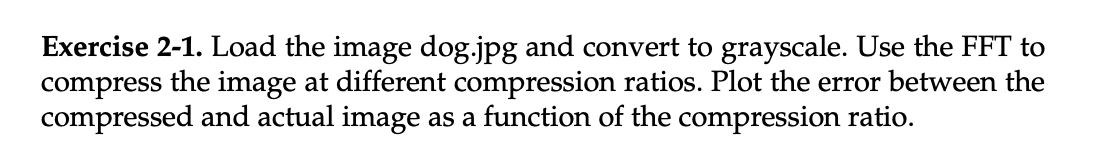

In [30]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams.update({'font.size': 18})
A = imread(os.path.join('..','DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

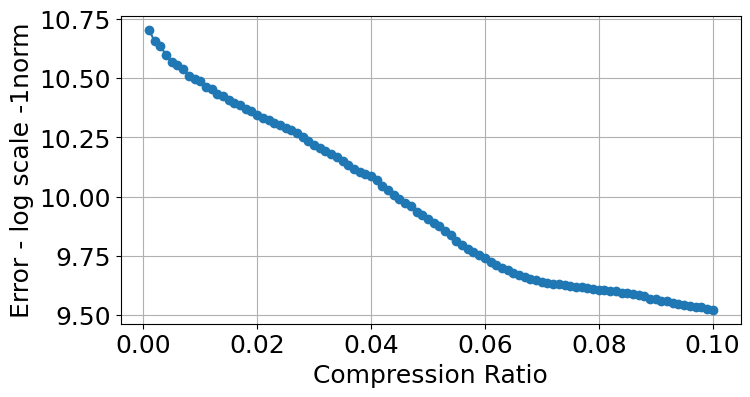

In [31]:
arr = np.linspace(0.1,0.001, 100)
error = np.zeros(len(arr))
# Zero out all small coefficients and inverse transform
for i,keep in enumerate(arr):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    error[i] = np.linalg.norm(B-Alow, ord=1)
error = np.log(error)
plt.plot(arr, error, marker='o', linestyle='-')
plt.xlabel('Compression Ratio')
plt.ylabel('Error - log scale -1norm')
plt.grid(True)
plt.show()

### Q2
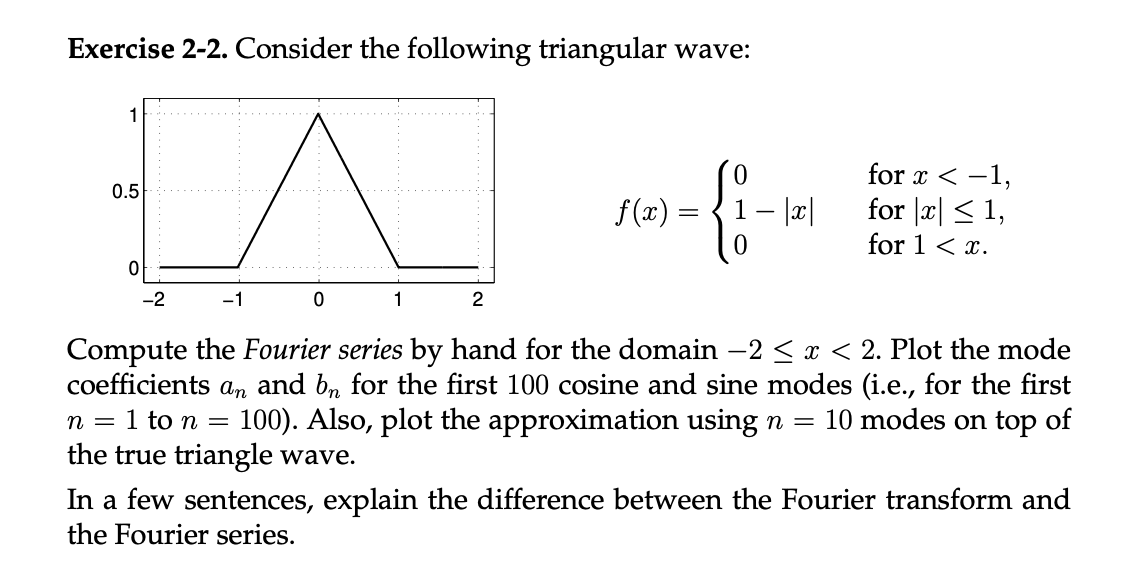

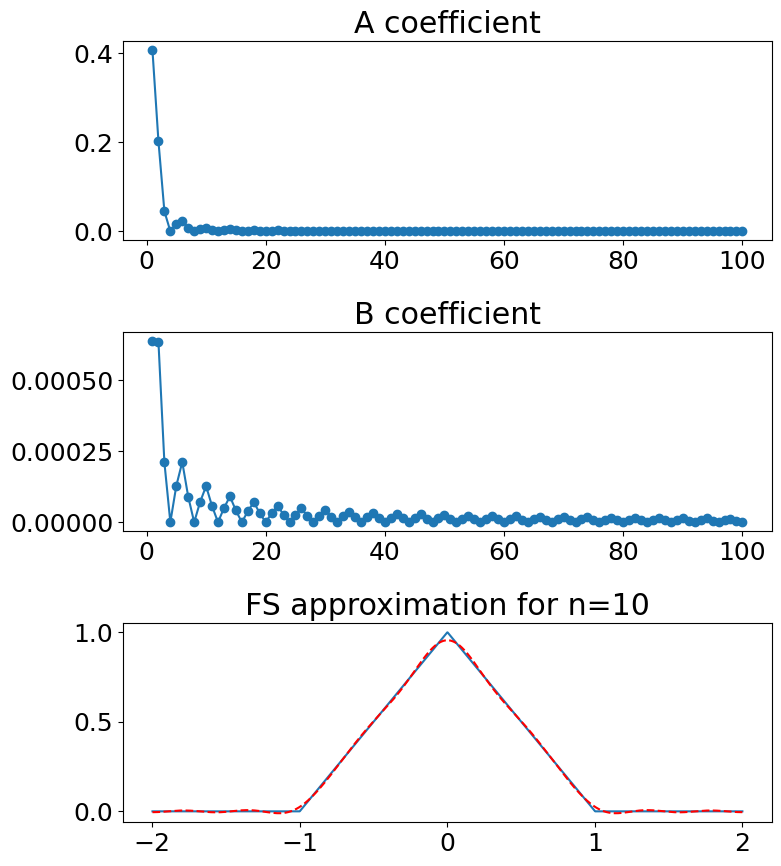

In [47]:
plt.rcParams['figure.figsize'] = [8,9]
# Define domain
dx = 0.001
L = 2
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2
fFS_list = [fFS]

A = np.zeros(100)
B = np.zeros(100)
for k in range(100):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    fFS_list.append(fFS)

fig,ax = plt.subplots(3,1)
ax[0].plot(range(1,101), A, marker='o', linestyle='-')
ax[1].plot(range(1,101), B, marker='o', linestyle='-')
ax[2].plot(x,f, linestyle='-')
ax[2].plot(x,fFS_list[9], linestyle='--', color = 'r')
ax[0].set_title('A coefficient')
ax[1].set_title('B coefficient')
ax[2].set_title('FS approximation for n=10')
plt.tight_layout()
plt.show()

Difference between Fourier Transform and Fourier Series is Fourier transform is generalisation of Fourier Series over non-periodic function. 

### Q3
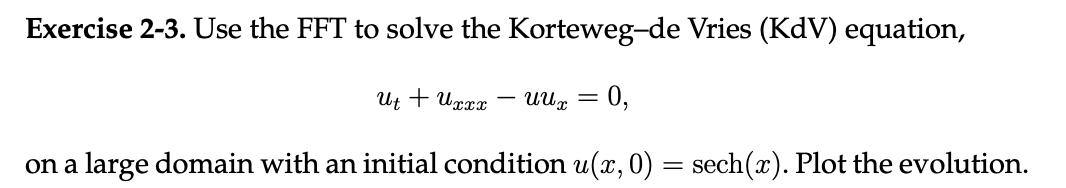

###